# Introducción

Hoy en día, las compañías de seguros necesitan tomar decisiones cada vez más precisas para mejorar su funcionamiento y reducir riesgos. Para eso, el análisis de datos se ha vuelto una herramienta muy útil, ya que permite entender mejor qué está pasando con los siniestros, cómo se comportan los asegurados y qué factores pueden influir en los costos.

Contar con datos concretos sobre las características de los trabajadores y los accidentes reportados ayuda a detectar ciertos patrones. Por ejemplo, se puede analizar si la edad, el tipo de jornada laboral, el tiempo que tarda en reportarse el siniestro o el tipo de accidente tienen alguna relación con el costo final que enfrenta la aseguradora.

Este proyecto toma un conjunto de datos reales sobre siniestros laborales para explorarlos y encontrar relaciones entre distintas variables. La idea es aprovechar esta información para sacar conclusiones que puedan servirle a una compañía de seguros a la hora de prevenir accidentes costosos y mejorar la forma en que se gestionan los reclamos.

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos un CSV de GitHub
url='https://raw.githubusercontent.com/prathibha13/Insurance-Claim-Prediction/refs/heads/main/train_SJC.csv'


In [3]:
# Observamos la tabla para revisar si se debe hacer modificaciones
seguros_dataset= pd.read_csv(url,sep=',',decimal='.')
seguros_dataset


,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0.0,344.16,F,40,5.0,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886
36173,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0.0,1668.83,F,71,7.0,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.6326
36174,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0.0,204.87,P,20,4.0,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.2814718
36175,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0.0,730.87,F,38,5.0,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.49576


In [4]:
# El archivo contiene un encabezado desordenado: los nombres de las columnas están distribuidos entre la primera y segunda fila.
# Eliminamos ambas filas y asignamos manualmente los nombres correctos a las columnas.
seguros_dataset = pd.read_csv (url, sep=',', header=None, skiprows=2)
nombres_columnas = ['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']
seguros_dataset.columns = nombres_columnas
seguros_dataset

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0,344.16,F,40.0,5,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886
36172,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0,1668.83,F,71.0,7,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.632600
36173,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0,204.87,P,20.0,4,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.281472
36174,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0,730.87,F,38.0,5,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.495760


In [5]:
# Convertimos los valores de ciertas columnas a datos numéricos con pd.to_numeric(), usando errors='coerce' para que cualquier dato no convertible se transforme en NaN.
seguros_dataset['Age'] = pd.to_numeric(seguros_dataset['Age'], errors='coerce')
seguros_dataset['DependentChildren'] = pd.to_numeric(seguros_dataset['DependentChildren'], errors='coerce')
seguros_dataset['WeeklyWages'] = pd.to_numeric(seguros_dataset['WeeklyWages'], errors='coerce')
seguros_dataset['HoursWorkedPerWeek'] = pd.to_numeric(seguros_dataset['HoursWorkedPerWeek'], errors='coerce')
seguros_dataset['InitialIncurredCalimsCost'] = pd.to_numeric(seguros_dataset['InitialIncurredCalimsCost'], errors='coerce')
seguros_dataset['UltimateIncurredClaimCost'] = pd.to_numeric(seguros_dataset['UltimateIncurredClaimCost'], errors='coerce')


In [6]:
# El dataset es un dataframe, el cual es ideal para el manejo de datos permitiendo un buen manejo de metodos poderosos de analisis
# Facilita la limpieza, se integra facilmente con otras librerias, entre otros.
type(seguros_dataset)

pandas.core.frame.DataFrame

In [7]:
# Mostramos 5 filas del daaset de manera arbitraria
seguros_dataset.sample(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
12945,WC3637636,1992-12-31T09:00:00Z,1993-01-16T00:00:00Z,25,F,S,0,0,237.00,P,30.0,4,SLIPPED ON WET CONCRETE FLOOR LACERATION LEFT ...,4000,3608.750974
25475,WC3832838,1992-01-07T08:00:00Z,1992-01-17T00:00:00Z,21,M,S,0,0,446.52,F,38.0,5,FLASH WELDER FLASH TO RIGHT FINGER,400,445.513062
29294,WC1665516,1988-09-13T08:00:00Z,1988-10-12T00:00:00Z,51,M,M,0,0,287.50,F,40.0,5,OIL SPLASHED INTO EYES BURNED EYE,1800,948.119177
16367,WC8144981,2002-10-21T13:00:00Z,2002-12-18T00:00:00Z,24,M,S,0,0,200.00,F,44.0,5,HIT WITH HAMMER RIGHT SHOULDER INJURY,11500,8696.189349
18506,WC5551455,1996-06-25T08:00:00Z,1996-07-17T00:00:00Z,42,M,M,0,0,640.30,F,38.0,5,CRUSH FINGER CUTTING STEEL LACERATION RIGHT IN...,13000,6870.028402


In [8]:
# Los costos finales de las reclamaciones suelen ser mayores que los iniciales, con alta variabilidad y presencia de valores extremos.
# La media es mucho mayor que la mediana, indicando un sesgo hacia costos elevados.
seguros_dataset[['InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']].describe()

,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,3.617600e+04
mean,7743.593874,1.095282e+04
std,18223.698531,3.529614e+04
min,1.000000,1.218868e+02
25%,700.000000,9.257424e+02
50%,2000.000000,3.373862e+03
75%,9500.000000,8.186852e+03
max,830000.000000,4.027136e+06


In [9]:
# El dataset tiene 36,176 registros con datos mayormente completos, aunque algunas columnas presentan algunos valores nulos
seguros_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  int64  
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  int64  
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

In [10]:
seguros_dataset.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


In [11]:
seguros_dataset.shape

(36176, 15)

In [12]:
seguros_dataset.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

# Descripcion de variables

---

Número de Reclamo: Es el identificador único de la póliza.

Fecha y Hora del Accidente: Momento exacto en que ocurrió el accidente.

Fecha del Reporte: Día en que se notificó el accidente a la aseguradora.

Edad: Edad de la persona que sufrió el accidente.

Género: Género del trabajador o trabajadora.

Estado Civil: Estado civil de la persona: (M) Casado/a, (S) Soltero/a, (U) Desconocido.

Hijos Dependientes: Cantidad de hijos a cargo.

Otros Dependientes: Número de personas a cargo que no son hijos (por ejemplo, padres, pareja, etc.).

Salario Semanal: Monto total que gana a la semana.

Tipo de Jornada: Indica si trabaja medio tiempo (P) o tiempo completo (F).

Horas Trabajadas por Semana: Total de horas que trabaja en una semana.

Días Trabajados por Semana: Cuántos días trabaja a la semana.

Descripción del Reclamo: Texto libre donde se detalla lo que ocurrió o cómo fue el accidente.

Costo Inicial Estimado del Reclamo: Estimación inicial que hace la aseguradora del costo que podría tener el reclamo.

Costo Final del Reclamo: Total que realmente pagó la aseguradora por ese caso. Este es el valor que se busca predecir en el conjunto de prueba.



In [13]:
# Valores unicos de las variables categoricas
seguros_dataset.select_dtypes(include=['object']).apply(pd.unique)

,0
ClaimNumber,"[WC8205482, WC6922469, WC5442654, WC9796897, W..."
DateTimeOfAccident,"[2002-04-09T07:00:00Z, 1999-01-07T11:00:00Z, 1..."
DateReported,"[2002-07-05T00:00:00Z, 1999-01-20T00:00:00Z, 1..."
Gender,"[M, F, U]"
MaritalStatus,"[M, U, S, nan]"
PartTimeFullTime,"[F, P]"
ClaimDescription,[LIFTING TYRE INJURY TO RIGHT ARM AND WRIST IN...


In [14]:
# Contar valores únicos en Gender
print(seguros_dataset["Gender"].value_counts())

# Mostrar cuántos registros tienen 'U'
print("Cantidad de registros con Gender = 'U':", (seguros_dataset["Gender"] == 'U').sum())

Gender
M    27919
F     8256
U        1
Name: count, dtype: int64
Cantidad de registros con Gender = 'U': 1


In [15]:
# Se elimina ese unico registro 'U' :
seguros_dataset = seguros_dataset[seguros_dataset["Gender"] != 'U']

In [16]:
# El resumen indica que hay valores faltantes en tres columnas del dataset: 22 en MaritalStatus, 56 en WeeklyWages y 49 en HoursWorkedPerWeek. Las demás columnas no tienen datos nulos.
seguros_dataset.isna().sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,22
DependentChildren,0
DependentsOther,0
WeeklyWages,56
PartTimeFullTime,0


In [17]:
porcentaje_nulos= (seguros_dataset.isna().sum()/seguros_dataset.shape[0])*100
porcentaje_nulos = porcentaje_nulos.round(2).astype(str) + ' %'
print(porcentaje_nulos)

ClaimNumber                   0.0 %
DateTimeOfAccident            0.0 %
DateReported                  0.0 %
Age                           0.0 %
Gender                        0.0 %
MaritalStatus                0.06 %
DependentChildren             0.0 %
DependentsOther               0.0 %
WeeklyWages                  0.15 %
PartTimeFullTime              0.0 %
HoursWorkedPerWeek           0.14 %
DaysWorkedPerWeek             0.0 %
ClaimDescription              0.0 %
InitialIncurredCalimsCost     0.0 %
UltimateIncurredClaimCost     0.0 %
dtype: object


In [18]:
# Resumimos todo con un contador de valores nulos por cada variable
nulos_por_variable = seguros_dataset.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(seguros_dataset)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: MaritalStatus, Cantidad de Nulos: 22, Porcentaje: 0.06%
Variable: WeeklyWages, Cantidad de Nulos: 56, Porcentaje: 0.15%
Variable: HoursWorkedPerWeek, Cantidad de Nulos: 49, Porcentaje: 0.14%


# Estrategias para rellenar valores nulos

MaritalStatus (Estado Civil)
Rellenamos con la moda del estado civil.  Al ser una categoría, usar el valor que más aparece es la forma más sencilla y lógica para completar los datos faltantes sin introducir valores raros.


---


WeeklyWages (Salario semanal) y HoursWorkedPerWeek (Horas trabajadas por semana)
Rellenamos ambos con la mediana porque pueden tener valores muy altos o muy bajos que "desbalancean" la media. La mediana, que es el valor central cuando ordenamos los datos, no se ve afectada por estos valores extremos


In [19]:
# Convertimos columnas de texto a datetime
seguros_dataset.loc[:, 'DateTimeOfAccident'] = pd.to_datetime(seguros_dataset['DateTimeOfAccident'], errors='coerce')
seguros_dataset.loc[:, 'DateReported'] = pd.to_datetime(seguros_dataset['DateReported'], errors='coerce')

In [20]:
seguros_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36175 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36175 non-null  object 
 1   DateTimeOfAccident         36175 non-null  object 
 2   DateReported               36175 non-null  object 
 3   Age                        36175 non-null  int64  
 4   Gender                     36175 non-null  object 
 5   MaritalStatus              36153 non-null  object 
 6   DependentChildren          36175 non-null  int64  
 7   DependentsOther            36175 non-null  int64  
 8   WeeklyWages                36119 non-null  float64
 9   PartTimeFullTime           36175 non-null  object 
 10  HoursWorkedPerWeek         36126 non-null  float64
 11  DaysWorkedPerWeek          36175 non-null  int64  
 12  ClaimDescription           36175 non-null  object 
 13  InitialIncurredCalimsCost  36175 non-null  int64  


In [21]:
# Aseguramos que estamos trabajando sobre una copia real, no una vista
seguros_dataset = seguros_dataset.copy()

# Convertimos columnas de texto a datetime
seguros_dataset['DateTimeOfAccident'] = pd.to_datetime(seguros_dataset['DateTimeOfAccident'], errors='coerce')
seguros_dataset['DateReported'] = pd.to_datetime(seguros_dataset['DateReported'], errors='coerce')

# Extraemoscomponentes de fecha

# Incluimos el año del accidente porque con el tiempo cambian los costos por inflación
# y también pueden variar las reglas o la forma en que se manejan los reclamos.
seguros_dataset['Accident_year'] = seguros_dataset['DateTimeOfAccident'].dt.year

# Consideramos el mes, puede llevar a una mayor inflación en estos últimos,
# las vacaciones que puede llevar a menor personal llevando a mayores riesgos, sobrellevando mayores costos.
seguros_dataset['Accident_month'] = seguros_dataset['DateTimeOfAccident'].dt.month

# Tomamos el día de semana, porque algunos días pueden tener mayores demandas que otros.
# Por otra parte, los feriados o domingos suele haber un menor personal que puede derivar a mayores costos.
seguros_dataset['Accident_dayofweek'] = seguros_dataset['DateTimeOfAccident'].dt.dayofweek

# El día que se reporta el accidente es importante porque un retraso puede llevar a demoras
# en gestiones de seguimiento, permitiendo así mayores costos directos.
seguros_dataset['days_report'] = (seguros_dataset['DateReported'] - seguros_dataset['DateTimeOfAccident']).dt.days

# Mostrar columnas extraídas para verificar
seguros_dataset[['Accident_year', 'Accident_month', 'Accident_dayofweek', 'days_report']].head()

,Accident_year,Accident_month,Accident_dayofweek,days_report
0,2002,4,1,86
1,1999,1,3,12
2,1996,3,0,20
3,2005,6,2,29
4,1990,8,2,28


In [22]:
seguros_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36175 entries, 0 to 36175
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                36175 non-null  object             
 1   DateTimeOfAccident         36175 non-null  datetime64[ns, UTC]
 2   DateReported               36175 non-null  datetime64[ns, UTC]
 3   Age                        36175 non-null  int64              
 4   Gender                     36175 non-null  object             
 5   MaritalStatus              36153 non-null  object             
 6   DependentChildren          36175 non-null  int64              
 7   DependentsOther            36175 non-null  int64              
 8   WeeklyWages                36119 non-null  float64            
 9   PartTimeFullTime           36175 non-null  object             
 10  HoursWorkedPerWeek         36126 non-null  float64            
 11  DaysWor

In [23]:
# Rellenar valores nulos en 'MaritalStatus' con la moda
seguros_dataset.loc[:, 'MaritalStatus'] = seguros_dataset['MaritalStatus'].fillna(seguros_dataset['MaritalStatus'].mode()[0])

# Rellenar valores nulos en 'WeeklyWages' y 'HoursWorkedPerWeek' con la mediana
seguros_dataset.loc[:, 'WeeklyWages'] = seguros_dataset['WeeklyWages'].fillna(seguros_dataset['WeeklyWages'].median())
seguros_dataset.loc[:, 'HoursWorkedPerWeek'] = seguros_dataset['HoursWorkedPerWeek'].fillna(seguros_dataset['HoursWorkedPerWeek'].median())

# Verificar que ya no haya nulos
print("Valores nulos después de la imputación:")
print(seguros_dataset.isnull().sum())

Valores nulos después de la imputación:
ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
Accident_year                0
Accident_month               0
Accident_dayofweek           0
days_report                  0
dtype: int64


In [24]:
# verifcaremos los valores cero del dataset
zero = seguros_dataset == 0
zero.sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,0
DependentChildren,33897
DependentsOther,35857
WeeklyWages,0
PartTimeFullTime,0


In [25]:
inconsistentes = seguros_dataset[(seguros_dataset['HoursWorkedPerWeek'] == 0) & (seguros_dataset['DaysWorkedPerWeek'] > 0)]
print(inconsistentes)

      ClaimNumber        DateTimeOfAccident              DateReported  Age  \
571     WC4508245 1994-11-25 12:00:00+00:00 1994-12-12 00:00:00+00:00   32   
1801    WC8002080 2001-12-10 12:00:00+00:00 2001-12-12 00:00:00+00:00   22   
3209    WC8956589 2003-07-31 11:00:00+00:00 2003-08-18 00:00:00+00:00   32   
3435    WC5392053 1996-07-16 00:00:00+00:00 1996-08-01 00:00:00+00:00   25   
6785    WC9570195 2005-01-05 08:00:00+00:00 2005-01-17 00:00:00+00:00   20   
6917    WC4386943 1993-01-26 08:00:00+00:00 1993-02-10 00:00:00+00:00   54   
6924    WC2605026 1990-02-26 22:00:00+00:00 1990-03-07 00:00:00+00:00   58   
11737   WC4629346 1994-12-26 10:00:00+00:00 1995-01-09 00:00:00+00:00   42   
11787   WC9292792 2004-06-30 10:00:00+00:00 2004-07-29 00:00:00+00:00   39   
12313   WC9119691 2004-02-03 10:00:00+00:00 2004-03-09 00:00:00+00:00   32   
15274   WC4501645 1994-12-07 12:00:00+00:00 1994-12-19 00:00:00+00:00   59   
16922   WC4849048 1994-04-21 16:00:00+00:00 1994-05-16 00:00:00+

In [26]:
# Durante la revisión de los datos encontramos 16 registros donde las horas trabajadas aparecen como cero, pero se registran días trabajados mayores a cero.
# Como estos casos son muy pocos (menos del 0.05% del total), y no tenemos forma clara de corregirlos
# Decidimos eliminarlos para evitar confusiones o errores en el análisis. Así aseguramos que el conjunto de datos sea confiable y representativo.
seguros_datasetC1 = seguros_dataset[~((seguros_dataset['HoursWorkedPerWeek'] == 0) & (seguros_dataset['DaysWorkedPerWeek'] > 0))].copy()


In [27]:
print(seguros_datasetC1[(seguros_datasetC1['HoursWorkedPerWeek'] == 0) & (seguros_datasetC1['DaysWorkedPerWeek'] > 0)])


Empty DataFrame
Columns: [ClaimNumber, DateTimeOfAccident, DateReported, Age, Gender, MaritalStatus, DependentChildren, DependentsOther, WeeklyWages, PartTimeFullTime, HoursWorkedPerWeek, DaysWorkedPerWeek, ClaimDescription, InitialIncurredCalimsCost, UltimateIncurredClaimCost, Accident_year, Accident_month, Accident_dayofweek, days_report]
Index: []


In [28]:
# No existen valores duplicados en el dataset
seguros_datasetC1.duplicated().sum()

np.int64(0)

In [29]:
# Lista de columnas categóricas
columnas_categoricas = ['Gender', 'MaritalStatus', 'PartTimeFullTime',
    'ClaimDescription']
# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = seguros_dataset[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")
# No encontramos errores de escritura

Valores únicos en 'Gender': ['M' 'F']
Valores únicos en 'MaritalStatus': ['M' 'U' 'S']
Valores únicos en 'PartTimeFullTime': ['F' 'P']
Valores únicos en 'ClaimDescription': ['LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY'
 'STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE LEFT FOREARM'
 'CUT ON SHARP EDGE CUT LEFT THUMB' ...
 'REMOVING BROKEN GLASS LACERATED LEFT THUMB'
 'FELL OVER SPRAINED ANKLE AND KNEE INJURY'
 'LIFTING METAL CYLINDER STRAIN NECK']


In [30]:
seguros_dataset['ClaimDescription'].nunique()

20595

In [31]:
# Procedemos a aplicar un método de clustering, ya que la columna 'ClaimDescription' presenta una gran variedad de casos diferentes y buscamos una forma de agruparlos en categorías que faciliten su uso en el modelo de regresión."
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Lista con las descripciones de incidentes
texts = seguros_dataset['ClaimDescription'].tolist()

# Convertir textos a vectores TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Definir cantidad de clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar cada texto a un cluster
seguros_dataset.loc[:, 'cluster'] = kmeans.labels_

# Mostrar algunos ejemplos por cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(seguros_dataset[seguros_dataset['cluster'] == i]['ClaimDescription'].head(3))
    print("\n")

Cluster 0:
0    LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1    STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
4    REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...
Name: ClaimDescription, dtype: object


Cluster 1:
2                      CUT ON SHARP EDGE CUT LEFT THUMB
8     JACK SLIPPED CATCHING FINGER CUT LEFT LITTLE F...
17    HAND SLID ONTO BLADE LACERATION RIGHT HAND MID...
Name: ClaimDescription, dtype: object


Cluster 2:
10    STRAINED MUSCLE IN BACK STRAINED LOWER BACK PAIN
29                          LIFTING DOOR STRAINED BACK
50                    SLIPPED STRAINED LOWER BACK PAIN
Name: ClaimDescription, dtype: object


Cluster 3:
3                  DIGGING LOWER BACK LOWER BACK STRAIN
22                            BENDING LOWER BACK STRAIN
33    PUSHING SKIP BIN STRAIN LOWER BACK STRAIN SOFT...
Name: ClaimDescription, dtype: object


Cluster 4:
21           SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER
73     SLIPPED ON WET FLOOR SOFT TISSUE INJURY RIGHT ...
108  

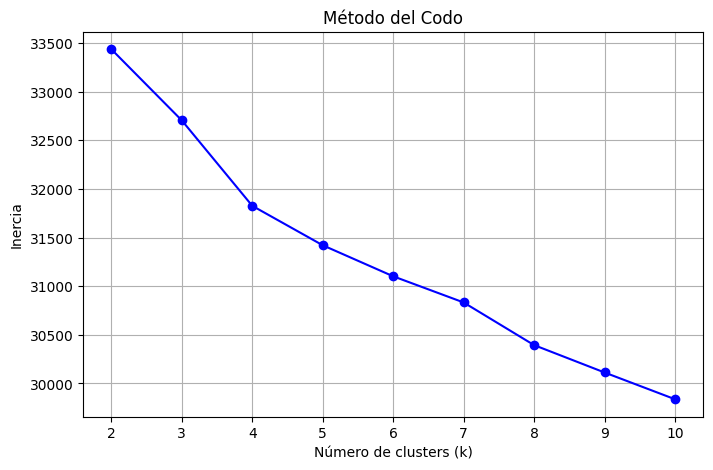

In [32]:
# Utilizamos el método del codo para encontrar el número óptimo de clusters
# Silhouette Score para evaluar la calidad del agrupamiento
# PCA para reducir la dimensionalidad y visualizar mejor los datos.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)   # probamos de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-', markersize=6)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()



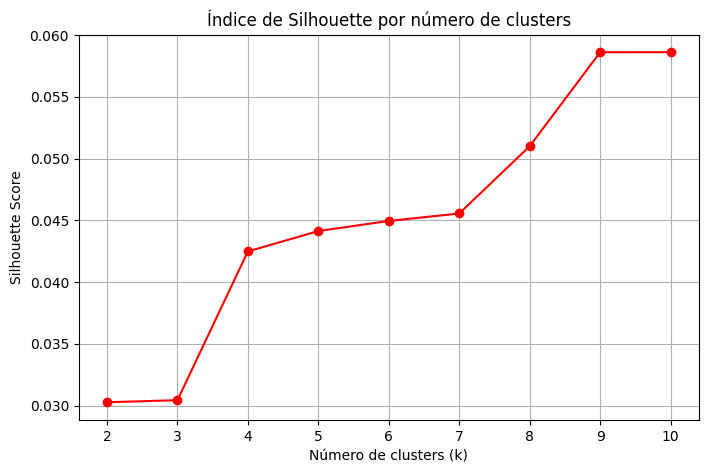

In [33]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, 'ro-', markersize=6)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Índice de Silhouette por número de clusters')
plt.grid(True)
plt.show()

In [34]:
# Luego de aplicar técnicas de validación para clustering, se determinó que la elección de 5 clusters (k=5) es adecuada para agrupar las descripciones de incidentes del dataset.
# El método del codo mostró que al aumentar de 4 a 5 clusters la inercia disminuye notablemente, pero al pasar de 5 a 6 clusters la reducción en inercia es muy pequeña,lo que indica que usar 5 clusters es un buen compromiso entre precisión y simplicidad.
# El Silhouette Score para k=5 fue bajo (~0.043), lo cual es común en datos de texto de alta dimensionalidad, indicando que los clusters no están fuertemente separados en el espacio original.

In [35]:
# Función manual basada en clusters
def agrupar_manual_por_cluster(desc):
    desc = str(desc).lower()


    if any(p in desc for p in ['foreign body', 'eye', 'cornea', 'dust', 'flash', 'bone', 'welding']):
        return 'Cuerpo extraño/Ojo/Infección'
    elif any(p in desc for p in ['cut', 'sharp', 'blade', 'laceration', 'finger', 'hand']):
        return 'Impacto/Corte/Quemadura'
    elif any(p in desc for p in ['fall', 'slip', 'bruised', 'knee', 'leg', 'burn']):
        return 'Caída/Esguince/Fractura'
    elif any(p in desc for p in ['digging', 'bending', 'pushing', 'strain', 'lower back']):
        return 'Esfuerzo/Levantamiento'
    elif any(p in desc for p in ['lifting', 'injury', 'fracture', 'reaching', 'muscle', 'shoulder']):
        return 'Levantamiento/Fractura/Esfuerzo'
    else:
        return 'Otro'

# Asignar la categoría a cada fila del dataset
seguros_datasetC1['categoria_incidente'] = seguros_dataset['ClaimDescription'].apply(agrupar_manual_por_cluster)

# Analizar resultados
otros_count = (seguros_datasetC1['categoria_incidente'] == 'Otro').sum()
total = len(seguros_datasetC1)

print(f"Cantidad de registros clasificados como 'Otro': {otros_count}")
print(f"Porcentaje de 'Otro': {otros_count/total*100:.2f}%")

Cantidad de registros clasificados como 'Otro': 4078
Porcentaje de 'Otro': 11.28%


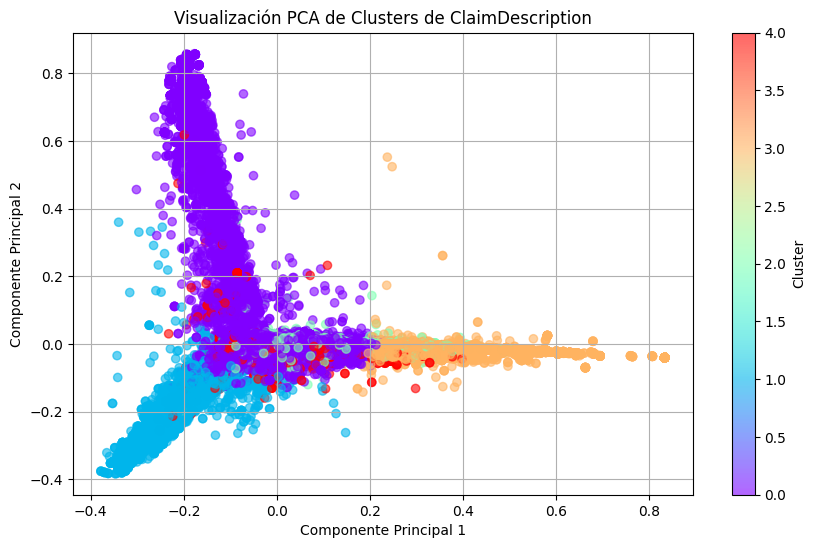

In [36]:
# Aplicacion de PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Vectorizacion de textos
texts = seguros_dataset['ClaimDescription'].fillna("").tolist()  # Por si hay NaNs
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)  #

# Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
seguros_dataset['cluster'] = kmeans.labels_

# 3. PCA sobre matriz sparse
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 4. Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=seguros_dataset['cluster'], cmap='rainbow', alpha=0.6)
plt.title('Visualización PCA de Clusters de ClaimDescription')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [37]:
# Se aplicó KMeans para agrupar las descripciones de siniestros (ClaimDescription) en 5 clusters, usando TF-IDF para convertir el texto en vectores numéricos (sobre una copia del dataset para evitar efectos colaterales).
# Luego, con PCA se redujo la dimensionalidad para visualizar los grupos en 2D.
# El gráfico muestra que los clusters están relativamente bien separados visualmente, lo cual indica que KMeans logró identificar patrones semánticos útiles, facilitando su uso como variable categórica para futuros modelos.

In [38]:
# Se procede a hacer una busqueda ramdom para achicar el porcentaje de 'Otro' a traves de nuevas palabras claves

print(seguros_datasetC1[seguros_datasetC1['categoria_incidente'] == 'Otro']['ClaimDescription'].sample(10))

17523      THUMB CAUGHT ON STEEL BAR LACERATED RIGHT THUMB
18096                                FELL OVER BACK SPRAIN
11234                TRIPPED AND HIT SIDE OF HEAD BRUISING
20521                      LOADING TRUCK WITH TRUCK STRESS
26724                      HIT FLOOR SHEET RIGHT ARM RIGHT
5793       FELL ON UNEVEN GROUND ANKLE TWISTED RIGHT ANKLE
19268        HIT VAN ON WAY TO WORK MOTOR VEHICLE ACCIDENT
15300                  CAR ACCIDENT MOTOR VEHICLE ACCIDENT
24666         ASSAULTED CUSTOMER CONCUSSION SHOCK LEFT ARM
19619    SANDING BOX GOT A SPLINTER SPLINTER UNDER LEFT...
Name: ClaimDescription, dtype: object


In [39]:
print(seguros_datasetC1[seguros_datasetC1['categoria_incidente'] == 'Otro']['ClaimDescription'].sample(10))

7265                      TURNED AND TWISTED TWISTED ANKLE
16497                  BETWEEN TIMBER AND KICKED BACK PAIN
730                TWISTED BACK INJURED BACK INFLAMED BACK
1624                               FELL OVER SPRAINED BACK
231                           FELL DOWN STAIRS BACK SPRAIN
15256    MOTOR VEHICLE ACCIDENT MOTOR VEHICLE ACCIDENT ...
718      CAUGHT BETWEEN CAR AND TWISTED SPRAINED RIGHT ...
15750    WHILE DEALING CARDS RIGHT TENDON SYNOVITIS RIG...
34070                SPRAINED LEFT ANKLE SPRAIN LEFT WRIST
18615           GLASSES BROKEN OPENING DOOR BROKEN GLASSES
Name: ClaimDescription, dtype: object


In [40]:
# Sumamos mas palabras claves para achicar la categoria otro
def agrupar_manual_por_cluster(desc):
    desc = str(desc).lower()

    if any(p in desc for p in [
        'foreign body', 'eye', 'cornea', 'dust', 'flash', 'bone', 'welding', 'infection']):
        return 'Cuerpo extraño/Ojo/Infección'

    elif any(p in desc for p in [
        'cut', 'sharp', 'blade', 'laceration', 'finger', 'hand', 'lacerated', 'grinding', 'hit', 'punctured',
        'knife', 'thumb', 'elbow', 'wrist', 'struck', 'air hose', 'stanley', 'slicing machine', 'coat hanger',
        'dicing', 'calf', 'side', 'bag']):
        return 'Impacto/Corte/Quemadura'

    elif any(p in desc for p in [
        'fall', 'slip', 'bruised', 'knee', 'leg', 'burn', 'walking', 'sprain', 'fell', 'twisted', 'swollen',
        'stairs', 'ladder', 'ankle', 'down', 'onto']):
        return 'Caída/Esguince/Fractura'

    elif any(p in desc for p in [
        'digging', 'bending', 'pushing', 'strain', 'lower back', 'climbing', 'carrying', 'repetitive',
        'overexertion', 'dealing cards']):
        return 'Esfuerzo/Levantamiento'

    elif any(p in desc for p in [
        'lifting', 'injury', 'fracture', 'reaching', 'muscle', 'shoulder', 'back', 'tendon', 'synovitis']):
        return 'Levantamiento/Fractura'

    elif any(p in desc for p in [
        'car accident', 'truck', 'motor vehicle', 'vehicle crash', 'collision', 'rolled over']):
        return 'Accidente vehicular'

    else:
        return 'Otro'

# Asignamos la categoría a cada fila del dataset
seguros_datasetC1['categoria_incidente'] = seguros_dataset['ClaimDescription'].apply(agrupar_manual_por_cluster)

# Analizamos los resultados
otros_count = (seguros_datasetC1['categoria_incidente'] == 'Otro').sum()
total = len(seguros_datasetC1)

print(f"Cantidad de registros clasificados como 'Otro': {otros_count}")
print(f"Porcentaje de 'Otro': {otros_count/total*100:.2f}%")

Cantidad de registros clasificados como 'Otro': 659
Porcentaje de 'Otro': 1.82%


In [41]:
# Calculo de outliers
columnas_a_analizar = ['InitialIncurredCalimsCost','UltimateIncurredClaimCost','Age','WeeklyWages','HoursWorkedPerWeek','DaysWorkedPerWeek']
outliers_iqr_dict = {}
for col in columnas_a_analizar:
    Q1 = seguros_datasetC1[col].quantile(0.25)
    Q3 = seguros_datasetC1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = seguros_datasetC1[(seguros_datasetC1[col] < lower_bound) | (seguros_datasetC1[col] > upper_bound)]
    outliers_iqr_dict[col] = outliers

    print(f"Outliers por IQR en '{col}': {len(outliers)} casos")

Outliers por IQR en 'InitialIncurredCalimsCost': 2889 casos
Outliers por IQR en 'UltimateIncurredClaimCost': 4525 casos
Outliers por IQR en 'Age': 15 casos
Outliers por IQR en 'WeeklyWages': 987 casos
Outliers por IQR en 'HoursWorkedPerWeek': 4913 casos
Outliers por IQR en 'DaysWorkedPerWeek': 3174 casos


In [42]:
seguros_datasetC1.sample(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Accident_year,Accident_month,Accident_dayofweek,days_report,categoria_incidente
15115,WC6396063,1998-12-15 01:00:00+00:00,1999-01-12 00:00:00+00:00,33,M,M,0,0,200.00,F,50.0,5,STRUCK OCTOPUS STRAP RIGHT EYE,500,256.030260,1998,12,1,27,Cuerpo extraño/Ojo/Infección
31060,WC4756847,1994-03-19 10:00:00+00:00,1994-05-18 00:00:00+00:00,24,M,S,0,0,300.00,F,32.0,5,HIT HEAD ON MACHINE LOWER BACK,7500,4957.067284,1994,3,5,59,Impacto/Corte/Quemadura
14226,WC2730527,1990-12-31 06:00:00+00:00,1991-04-22 00:00:00+00:00,27,M,S,0,0,379.14,F,40.0,5,STRUCK FALLING LOG BACK AND NECK,3500,4362.679736,1990,12,0,111,Impacto/Corte/Quemadura
31036,WC1627316,1988-01-31 16:00:00+00:00,1988-03-19 00:00:00+00:00,66,M,S,0,0,436.09,F,40.0,5,FOREIGN BODY FOREIGN BODY LEFT EYE LEFT EYE,105,445.036148,1988,1,6,47,Cuerpo extraño/Ojo/Infección
28280,WC4051740,1993-10-21 08:00:00+00:00,1993-10-30 00:00:00+00:00,50,F,M,0,0,546.82,F,37.5,5,FAINTED INJURY TO LOWER BACK INJURY,7500,8210.857619,1993,10,3,8,Esfuerzo/Levantamiento


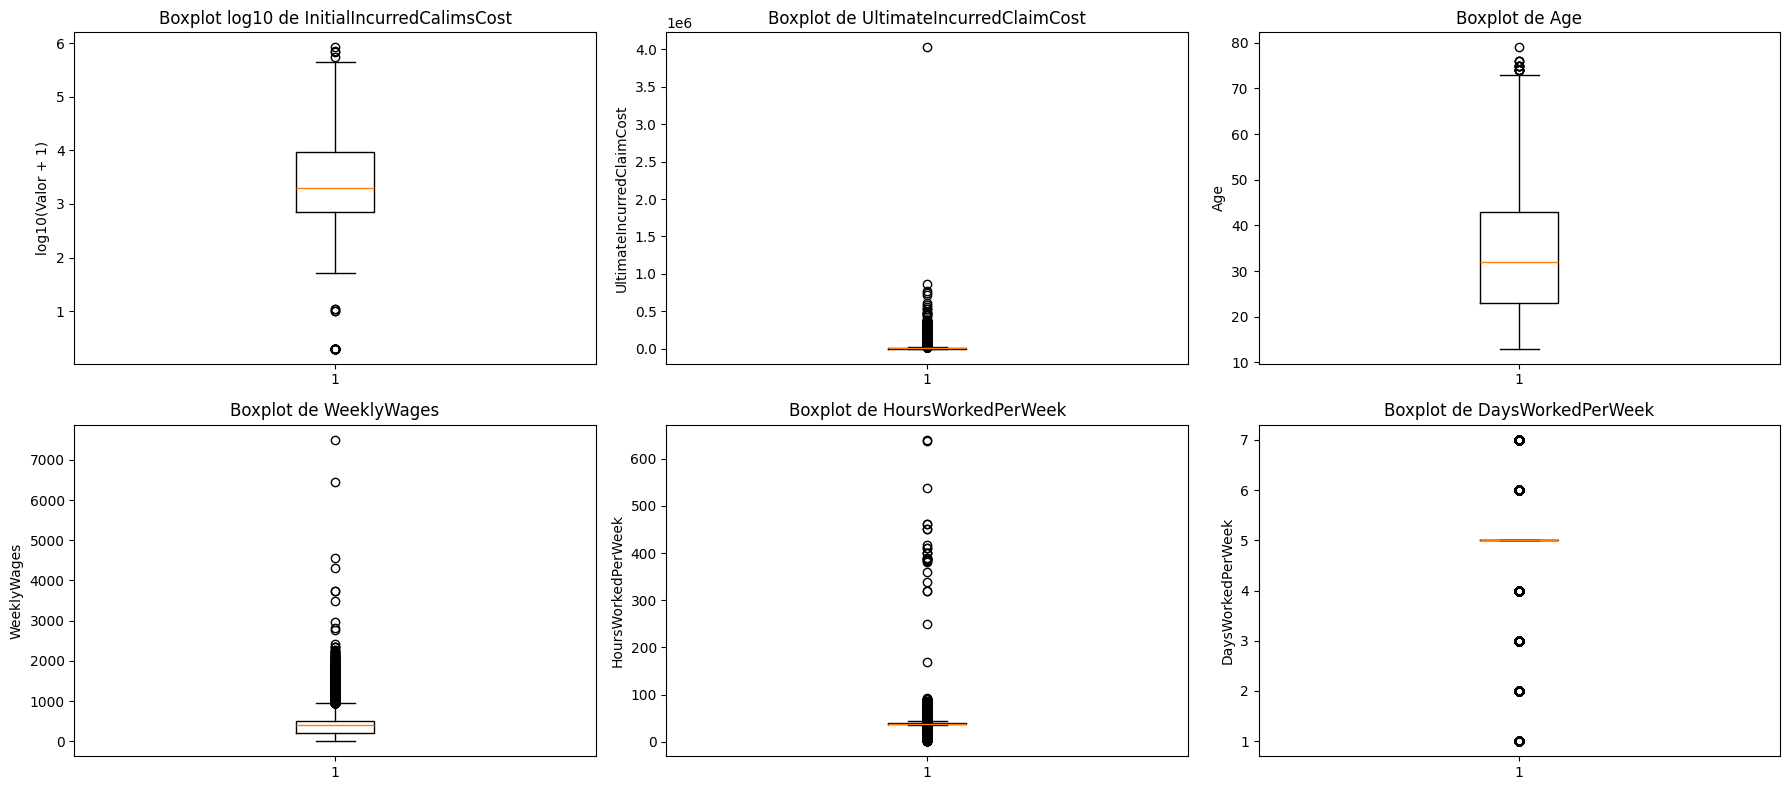

In [43]:
columnas_a_analizar = [
    'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost',
    'Age', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek'
]

plt.figure(figsize=(18, 8))

for i, col in enumerate(columnas_a_analizar, 1):
    plt.subplot(2, 3, i)

    datos = seguros_datasetC1[col].dropna()

    if col == 'InitialIncurredCalimsCost':
        datos_log = np.log10(datos + 1)
        plt.boxplot(datos_log)
        plt.title(f'Boxplot log10 de {col}')
        plt.ylabel('log10(Valor + 1)')
    else:
        plt.boxplot(datos)
        plt.title(f'Boxplot de {col}')
        plt.ylabel(col)

plt.tight_layout()
plt.show()

In [44]:
# Eliminamos el outlier mas alto de la columna UltimateIncurredClaimCost al alejarse de manera considerada al resto y puede generar problemas en el modelo.
maximo = seguros_datasetC1['UltimateIncurredClaimCost'].max()

# Filtrar el DataFrame para eliminar esa fila
seguros_datasetC1 = seguros_datasetC1[seguros_datasetC1['UltimateIncurredClaimCost'] < maximo].copy()

In [45]:
# Outliers de InitialIncurredCalimsCost
# Eliminamos aquellos valores menores a 20, considerando que es el mínimo costo razonable para un reclamo

umbral_original = 20

# Filtrar filas con InitialIncurredCalimsCost muy bajo
outliers_bajos = seguros_datasetC1[seguros_datasetC1['InitialIncurredCalimsCost'] < umbral_original]

print(f"Cantidad de casos con InitialIncurredCalimsCost < {umbral_original:.2f}: {len(outliers_bajos)}")
outliers_bajos[['ClaimNumber', 'InitialIncurredCalimsCost']]

# Eliminar valores menores a 20 (mantener 20 o más)
seguros_datasetC1 = seguros_datasetC1[seguros_datasetC1['InitialIncurredCalimsCost'] >= umbral_original]

print(f"Dataset actualizado. Total de filas restantes: {len(seguros_datasetC1)}")

Cantidad de casos con InitialIncurredCalimsCost < 20.00: 34
Dataset actualizado. Total de filas restantes: 36124


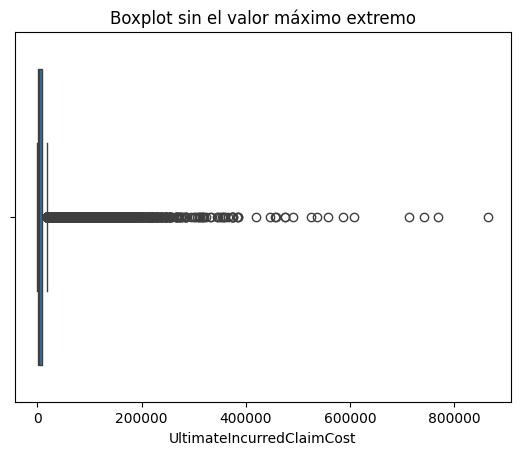

In [46]:
sns.boxplot(x=seguros_datasetC1['UltimateIncurredClaimCost'])
plt.title("Boxplot sin el valor máximo extremo")
plt.show()

In [47]:
# Calcular el percentil 95
umbral_95 = seguros_datasetC1['UltimateIncurredClaimCost'].quantile(0.95)

# Eliminar permanentemente las filas con valores mayores a ese umbral
seguros_datasetC1 = seguros_datasetC1[seguros_datasetC1['UltimateIncurredClaimCost'] <= umbral_95].copy()

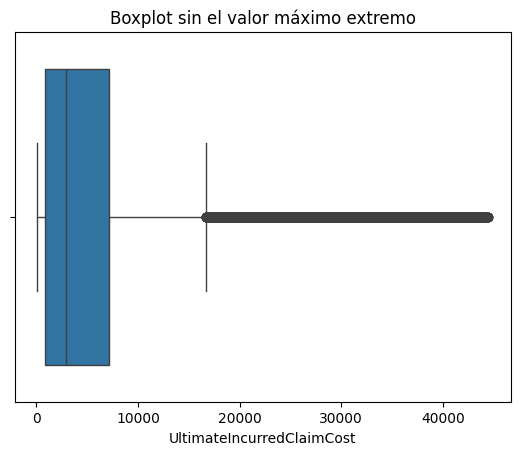

In [48]:
sns.boxplot(x=seguros_datasetC1['UltimateIncurredClaimCost'])
plt.title("Boxplot sin el valor máximo extremo")
plt.show()

In [49]:
max_valor = seguros_datasetC1['UltimateIncurredClaimCost'].max()
print("Valor máximo de UltimateIncurredClaimCost:", max_valor)

Valor máximo de UltimateIncurredClaimCost: 44454.12019


In [50]:
# Outliers 'Age' estan dentro de las edades que puede tener una persona a nivel global, por lo que no realizamos ninguna modificacion

In [51]:
outliers_salarios = seguros_datasetC1[seguros_datasetC1['WeeklyWages'] > 6000]
print(outliers_salarios[['ClaimNumber', 'WeeklyWages']])

# Se filtran y conservan solo los registros con WeeklyWages menores o iguales a 6000, ya que los valores superiores están muy alejados del resto y podrían afectar negativamente el rendimiento del modelo predictivo.
seguros_datasetC1 = seguros_datasetC1[seguros_datasetC1['WeeklyWages'] <= 6000]

# Confirmar el cambio
print(f"Filtrado completado. Total de filas restantes: {len(seguros_datasetC1)}")

      ClaimNumber  WeeklyWages
30882   WC8340683       7497.0
33724   WC9429394       6453.0
Filtrado completado. Total de filas restantes: 34315


In [52]:
print(seguros_datasetC1[seguros_datasetC1['HoursWorkedPerWeek'] > 80][['ClaimNumber', 'HoursWorkedPerWeek']])

      ClaimNumber  HoursWorkedPerWeek
295     WC4366343                90.0
601     WC9201892                84.0
1948    WC3899038                83.0
2082    WC8370983                84.0
3673    WC2831928               250.0
...           ...                 ...
34556   WC8224982                93.0
34557   WC6683566                84.0
34692   WC6661966                84.0
35485   WC6566465                84.0
35717   WC4167341               319.8

[86 rows x 2 columns]


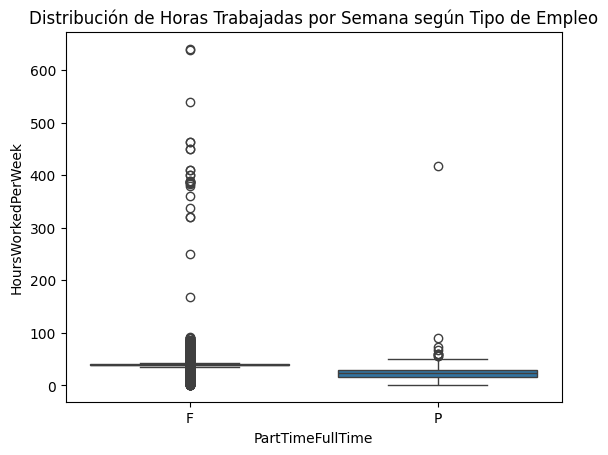

In [53]:
# Mostrar distribución de horas según tipo de empleo


sns.boxplot(x='PartTimeFullTime', y='HoursWorkedPerWeek', data=seguros_datasetC1)
plt.title('Distribución de Horas Trabajadas por Semana según Tipo de Empleo')
plt.show()


In [54]:
# Reviso los outliers en HoursWorkedPerWeek, tomando un maximo de horas trabajadas de 40 horas para un part time y 80 horas maximas para un full time.
# Filtrar valores absurdos según tipo de empleo
cond_part_time = (seguros_datasetC1['PartTimeFullTime'] == 'P') & (seguros_datasetC1['HoursWorkedPerWeek'] > 40)
cond_full_time = (seguros_datasetC1['PartTimeFullTime'] == 'F') & (seguros_datasetC1['HoursWorkedPerWeek'] > 80)

# Unir ambas condiciones
outliers_horas = seguros_datasetC1[cond_part_time | cond_full_time]

print("Outliers en Horas Trabajadas por Semana:")
print(outliers_horas[['ClaimNumber', 'PartTimeFullTime', 'HoursWorkedPerWeek']])



Outliers en Horas Trabajadas por Semana:
      ClaimNumber PartTimeFullTime  HoursWorkedPerWeek
295     WC4366343                F                90.0
601     WC9201892                F                84.0
805     WC6694666                P                48.0
1948    WC3899038                F                83.0
2082    WC8370983                F                84.0
...           ...              ...                 ...
34557   WC6683566                F                84.0
34692   WC6661966                F                84.0
35378   WC9808298                P                56.0
35485   WC6566465                F                84.0
35717   WC4167341                F               319.8

[105 rows x 3 columns]


In [55]:
# Eliminar esos outliers del dataset
seguros_datasetC1 = seguros_datasetC1[~(cond_part_time | cond_full_time)]

In [56]:
# Los outliers en DaysWorkedPerWeek pertenecen a los dias reales de la semana, por lo cual nos sera necesario realizar trabajos en ella.

# Objetivos

Objetivo general:

El objetivo principal de este análisis es utilizar herramientas de ciencia de datos para explorar y entender los patrones de una compania de seguros, y así poder hacer recomendaciones sobre cómo mejorar la toma de decisiones en la aseguradora

Objetivos especificos:

Identificar el tipo de siniestro más frecuente y evaluar si existen patrones comunes que expliquen su alta incidencia.

Analizar la proporción de accidentes entre empleados de tiempo completo y parcial, para entender cómo influye la jornada laboral en la frecuencia de siniestros.

Explorar la distribución de siniestros por género, observando si existe un predominio y posibles razones detrás de esa tendencia.

Comparar el costo promedio de los siniestros entre hombres y mujeres, desglosado por tipo de incidente, para detectar posibles diferencias relevantes.

Analizar el costo promedio de siniestro por categoría de incidente y comparar costos entre diferentes grupos de edad (Joven, Mediana edad, Mayor).

Estudiar la distribución de variables como salario semanal (WeeklyWages), edad y días hasta el reporte (days_report), para identificar sesgos, valores extremos o tendencias generales.

Examinar las correlaciones entre variables numéricas

Determinar qué variables pueden resultar relevantes para predecir el costo final del siniestro (UltimateIncurredClaimCostN) mediante análisis multivariado.

# Hipotesis

Se espera que los tipos de accidentes mas comunes representen Impacto/Corte/Quemadura y esfuerzo/levantamiento debido a la naturaleza operativa de muchas tareas laborales.

Es muy probable que en jornadas completa haya una mayor cantidad de riesgo de accidentes al estar un mayor tiempo en el trabajo

La mayoria de los accidentes seran de hombres pues suelen estar sometidos a trabajos mas peligrosos o que requieren mayor esfuerzo fisico.

No está claro si hay diferencias significativas en el costo promedio entre hombres y mujeres, por lo que se investigará si el género influye en los montos finales de los siniestros según la categoría del incidente.

Se espera que ciertos tipos de siniestros sean mayores que otros y a edades mayores tienen un costo mayor.

Se espera que las distribuciones de variables como salario y días hasta el reporte tengan sesgos positivos

Podría existir una correlación entre días trabajados, horas trabajadas y salario, pero su magnitud y relevancia deberán evaluarse con más profundidad.

Aunque se suele asociar mayor edad con mayores costos de recuperación, no se asume que la edad tenga una relación directa con el costo del siniestro. Esto se investigará en el análisis multivariado.







Object `casos` not found.


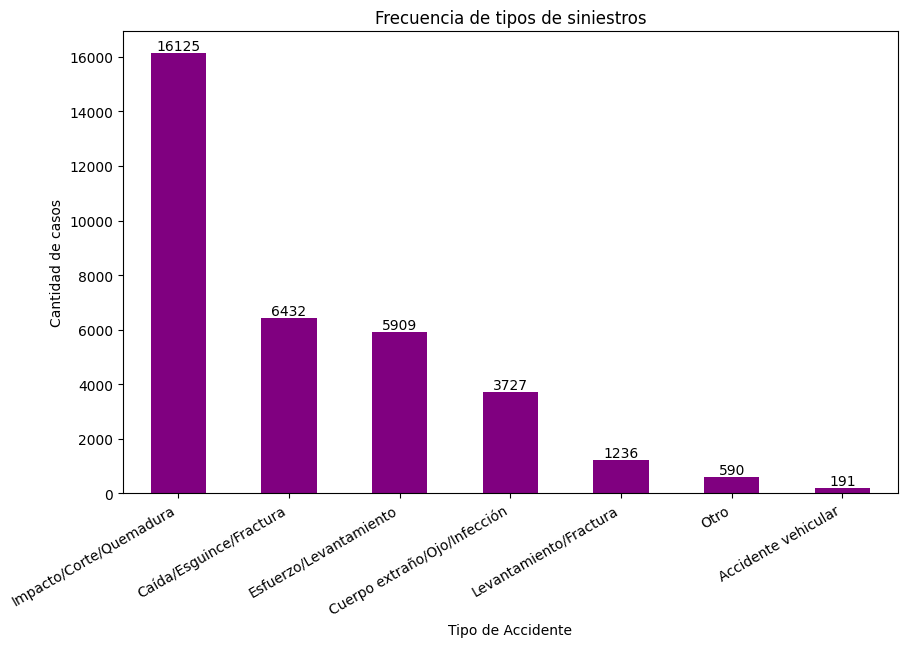

In [57]:
¿Cuál es el tipo de siniestro con el mayor numeros de casos?

plt.figure(figsize=(10, 6))
ax = seguros_datasetC1["categoria_incidente"].value_counts().plot(kind="bar", color="purple")
plt.title("Frecuencia de tipos de siniestros")
plt.xlabel("Tipo de Accidente")
plt.ylabel("Cantidad de casos")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

# En el gráfico se observa que el tipo de siniestro más frecuente es Impacto/Corte/Quemadura. Esto podría deberse a la naturaleza de las tareas realizadas, especialmente en sectores donde hay manipulación de herramientas, maquinaria o exposición a fuentes de calor.
# Los accidentes vehiculares representan el menor número de casos registrados. Esto podría sugerir que una menor proporción de trabajadores realiza tareas que implican conducir o desplazarse como parte del trabajo.
# Esta distribución ayuda a entender dónde se concentran los principales riesgos y podría ser relevante para priorizar medidas de prevención, así como para evaluar si el tipo de siniestro tiene relación con el costo final del reclamo (UltimateIncurredClaimCostN), lo que lo convierte en un candidato útil para incluir en el modelo de regresión.
# Se cumple en parte la primera hipotesis, donde el impacto/corte/quemadora es el de mayor frecuencia pero esfuerzo/levantamiento quedo en 3 posicion.

Object `parcial` not found.


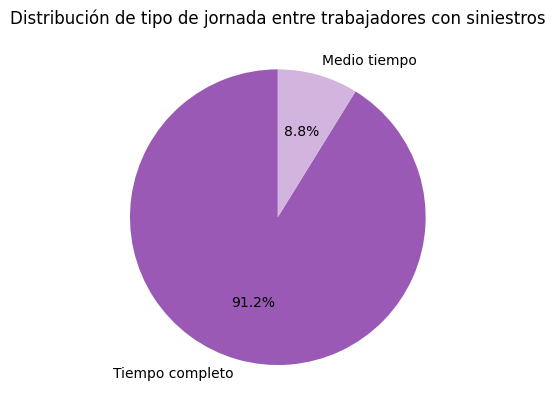

In [58]:
¿Cuál es la proporción de accidentes laborales que ocurre entre empleados de tiempo completo frente a los de tiempo parcial?

seguros_datasetC1["PartTimeFullTime"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=["#9b59b6", "#d2b4de"],  # Violeta oscuro y lavanda
    labels=["Tiempo completo", "Medio tiempo"]
)
plt.title("Distribución de tipo de jornada entre trabajadores con siniestros")
plt.ylabel("")  # Quita la etiqueta 'PartTimeFullTime'
plt.show()

# En el gráfico de torta podemos observar que una gran mayoría de los accidentes laborales involucra a empleados de tiempo completo, mientras que los trabajadores de medio tiempo representan una proporción mucho menor.
# Esto era de esperarse, ya que los trabajadores de tiempo completo pasan más horas expuestos a riesgos laborales. Esta visualización es útil para entender la composición del conjunto de datos y podría tener implicancias en la predicción del costo final del siniestro.
# Esta observación apoya la hipótesis de que la jornada laboral podría ser un factor relevante en la severidad del accidente, y por tanto, será considerada como variable explicativa en el modelo de regresión del UltimateIncurredClaimCostN
# Como era de esperarse, se cumple la hipotesis, pues aquellos que tienen un tiempo completo tienden a sufrir mas accidentes.

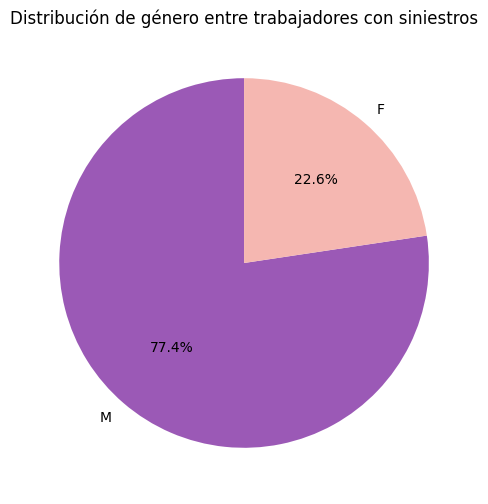

In [59]:
# ¿Que genero representa el mayor numero de siniestros?

plt.figure(figsize=(6, 6))
seguros_datasetC1["Gender"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=["#9b59b6", "#f5b7b1", "#dcdcdc"]
)
plt.title("Distribución de género entre trabajadores con siniestros")
plt.ylabel("")
plt.show()

# En el gráfico de torta podemos observa que la gran mayoría de los accidentes laborales involucra a personas de genero masculino.
# Es una observación esperable debido a la exposición a riesgos laborales, posiblemente por tareas físicamente exigentes y jornadas completas.
# Se cumple la hipotesis de que la mayoria de los accidentes son de hombres pues suelen estar sometidos a trabajos mas peligrosos o que requieren mayor esfuerzo fisico.


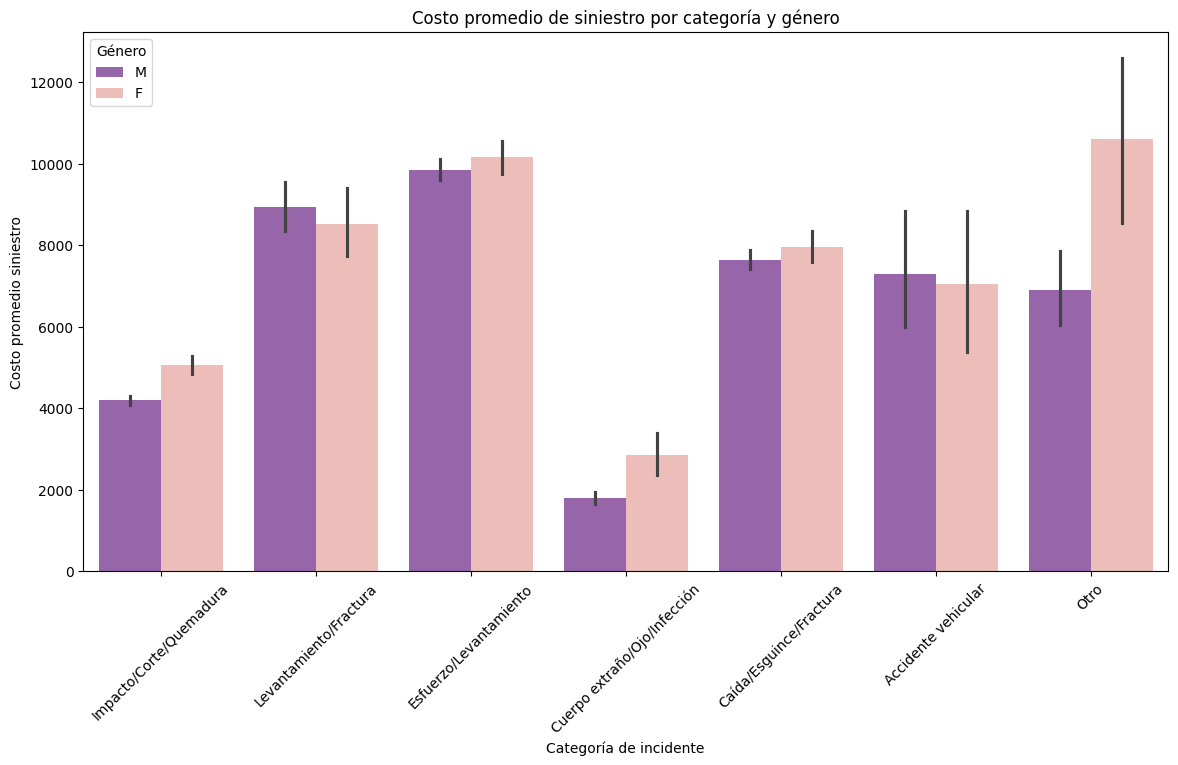

In [60]:
# ¿Existe una diferencia significativa en el costo promedio de siniestros entre hombres y mujeres según la categoría de incidente?

plt.figure(figsize=(14, 7))
sns.barplot(
    data=seguros_datasetC1,
    x='categoria_incidente',
    y='UltimateIncurredClaimCost',
    hue='Gender',
    palette=["#9b59b6", "#f5b7b1"]  # gris claro y rosa
)
plt.title('Costo promedio de siniestro por categoría y género')
plt.xlabel('Categoría de incidente')
plt.ylabel('Costo promedio siniestro')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

# Las categorías de incidente Esfuerzo/Levantamiento y Levantar/Fractura/Esfuerzo tienen los costos promedio más altos, lo que indica que este tipo de siniestros suelen ser más costosos en promedio que otros.
# En la mayoría de las categorías, las mujeres (F) presentan un costo promedio ligeramente mayor que los hombres (M).
# Los incidentes segun genero no son iguales segun la hipotesis, hay una leve variacion entre ambos generos pero no son iguales.

In [61]:
bins = [0, 30, 50, 100]
labels = ['Joven', 'Mediana edad', 'Mayor']
seguros_datasetC1['GrupoEdad'] = pd.cut(seguros_datasetC1['Age'], bins=bins, labels=labels)

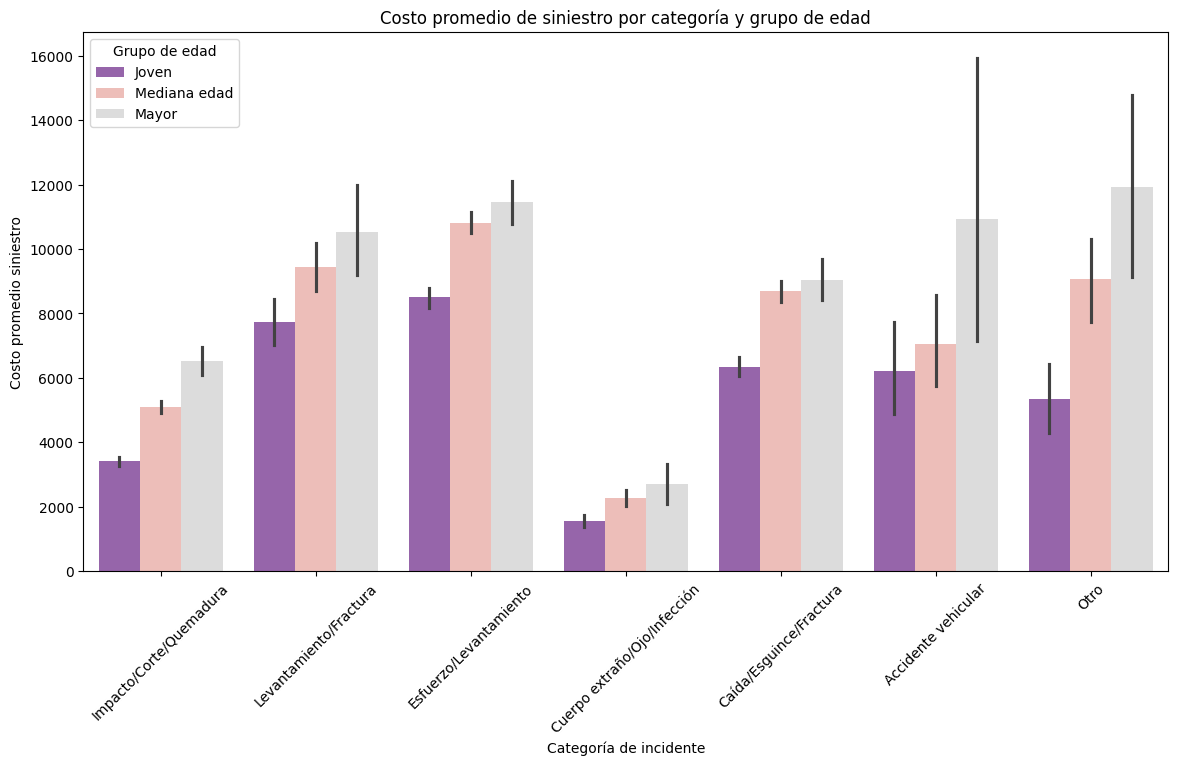

In [62]:
# ¿El costo promedio de siniestro varía según la categoría de incidente y el grupo de edad?

plt.figure(figsize=(14, 7))
sns.barplot(
    data=seguros_datasetC1,
    x='categoria_incidente',
    y='UltimateIncurredClaimCost',
    hue='GrupoEdad',  # asumiendo que la variable con grupos de edad se llama AgeGroup
    palette=["#9b59b6", "#f5b7b1", "#dcdcdc"]  # violeta, rosa, gris claro (por ejemplo)
)
plt.title('Costo promedio de siniestro por categoría y grupo de edad')
plt.xlabel('Categoría de incidente')
plt.ylabel('Costo promedio siniestro')
plt.xticks(rotation=45)
plt.legend(title='Grupo de edad')
plt.show()

# Las categorías “Esfuerzo/Levantamiento” y “Levantamiento/Fractura/Esfuerzo” tienen costos promedio más altos.
# En general, el grupo de edad “Mayor” tiende a tener costos mayores, aunque no siempre la diferencia es significativa.
# Se cumple la hipotesis, el mas grande tiende a costar mas y hay variaciones segun categoria y edad.

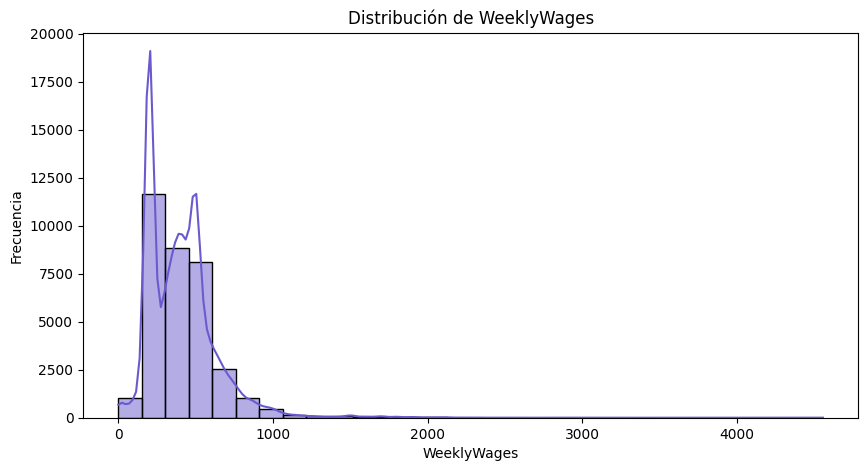

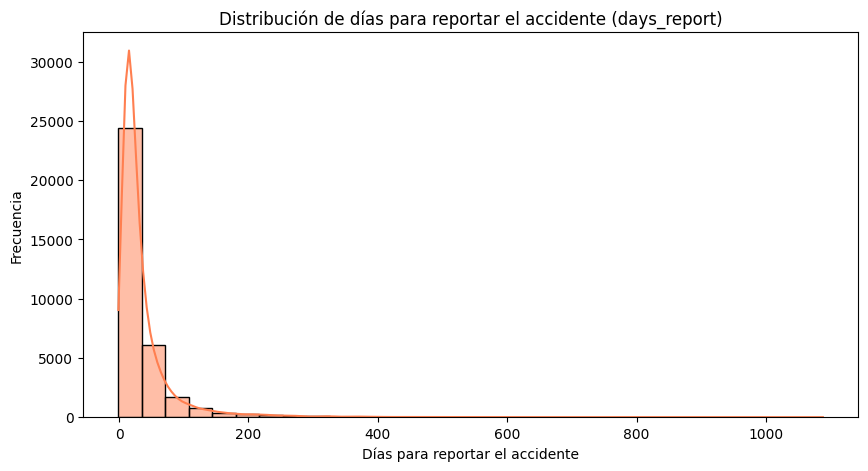

In [63]:
# ¿Qué patrones presentan las distribuciones de WeeklyWages y days_report en el conjunto de datos?


plt.figure(figsize=(10, 5))
sns.histplot(seguros_datasetC1["WeeklyWages"].dropna(), bins=30, kde=True, color="#6a5acd")
plt.title("Distribución de WeeklyWages")
plt.xlabel("WeeklyWages")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(seguros_datasetC1["days_report"].dropna(), bins=30, kde=True, color="#ff7f50")
plt.title("Distribución de días para reportar el accidente (days_report)")
plt.xlabel("Días para reportar el accidente")
plt.ylabel("Frecuencia")
plt.show()

# Ambas variables muestran un sesgo positivo, indicando que la mayoría de los empleados lesionados tienen salarios y tiempos de reporte bajos, pero existen casos con valores significativamente más altos.

# En el caso de WeeklyWages, se observa una fluctuación inicial con subidas y bajadas antes de estabilizarse en una distribución sesgada positivamente. Esto puede reflejar distintos grupos salariales dentro del conjunto de empleados lesionados.

# Se cumple la hipotesis, pues ambos presentan sesgos positivos.


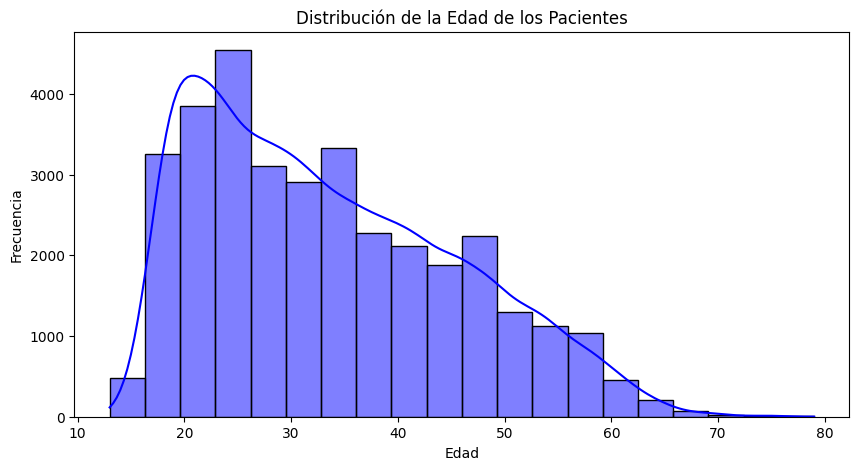

In [64]:
# ¿Qué patrones presentan las distribucion Age en el conjunto de datos?

plt.figure(figsize=(10, 5))
sns.histplot(seguros_datasetC1['Age'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# El grafico muesta un sesgo positivo, muy comun que a medida que son mayores tienden a trabajar menos personas, mientras que a menor edad suele haber mayor oferta y a mayores esfuerzos.
# La edad juega un rol muy importante en el costo del siniestro, pues la recuperacion de un mayor tiende a ser mucho mas largo y costoso que una persona joven.
# Se cumple la hipotesis, pues ambos presentan sesgos positivos.



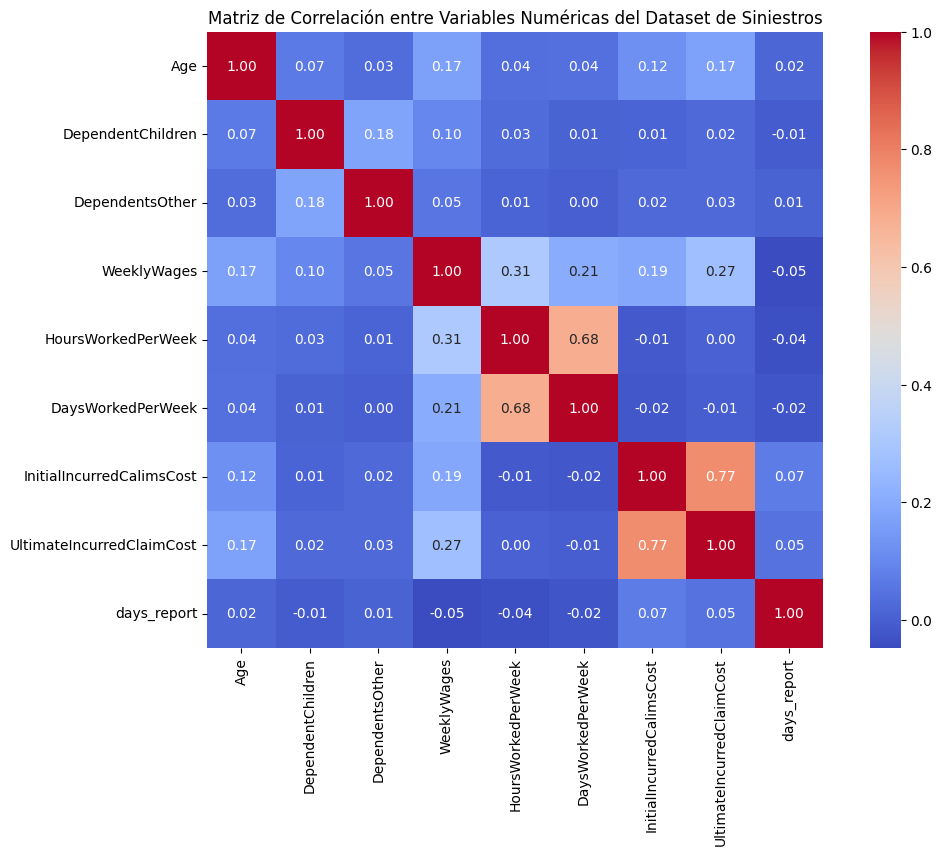

In [65]:
# Seleccionar variables numéricas
variables_numericas = [
    'Age',
    'DependentChildren',
    'DependentsOther',
    'WeeklyWages',
    'HoursWorkedPerWeek',
    'DaysWorkedPerWeek',
    'InitialIncurredCalimsCost',
    'UltimateIncurredClaimCost',
    'days_report'
]

# Calcular matriz de correlación
correlation_matrix = seguros_datasetC1[variables_numericas].corr()

# Graficar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas del Dataset de Siniestros")
plt.show()

# La correlación entre DaysWorkedPerWeek y HoursWorkedPerWeek es de 0.68, el cual es razonable que a medida que aumentan los días trabajados en la semana, también tienden a aumentar las horas trabajadas.
# Correlaciones de WeeklyWages con DaysWorkedPerWeek(0.21), HoursWorkedPerWeek(0.31), Age (0.17) InitialIncurredClaimsCost (0.19). Donde las horas tiene una relacion positiva moderada, pues mas horas mayarores salarios
# Con los dias es levemente menor porque tambien varia segun la jornada si es "P" O "F"
# Con initialIncurredClaimsCost es una relacion leve, pues el salario no determina directamente el costo medico estimado al principio
# La edad suele tener una relacion con el salario, pues a mayor edad tienden a tener mayor sueldo por experiencia.
# Se cumple la hipotesis de que hay correlacion, aunque es leve.

In [66]:
# Crear variable categórica 'CostoCategoria' basada en terciles del costo final
seguros_datasetC1['CostoCategoria'] = pd.qcut(
    seguros_datasetC1['UltimateIncurredClaimCost'],
    q=3,  # Dividir en 3 grupos (bajo, medio, alto)
    labels=['Bajo', 'Medio', 'Alto']
)

# Verificar la distribución
print(seguros_datasetC1['CostoCategoria'].value_counts())

# Creamos esta variable para usarla como 'hue' en gráficos para ver si otras variables numéricas presentan patrones distintos según niveles de costo logrando tambien facilitar la exploración visual


CostoCategoria
Bajo     11404
Alto     11404
Medio    11402
Name: count, dtype: int64


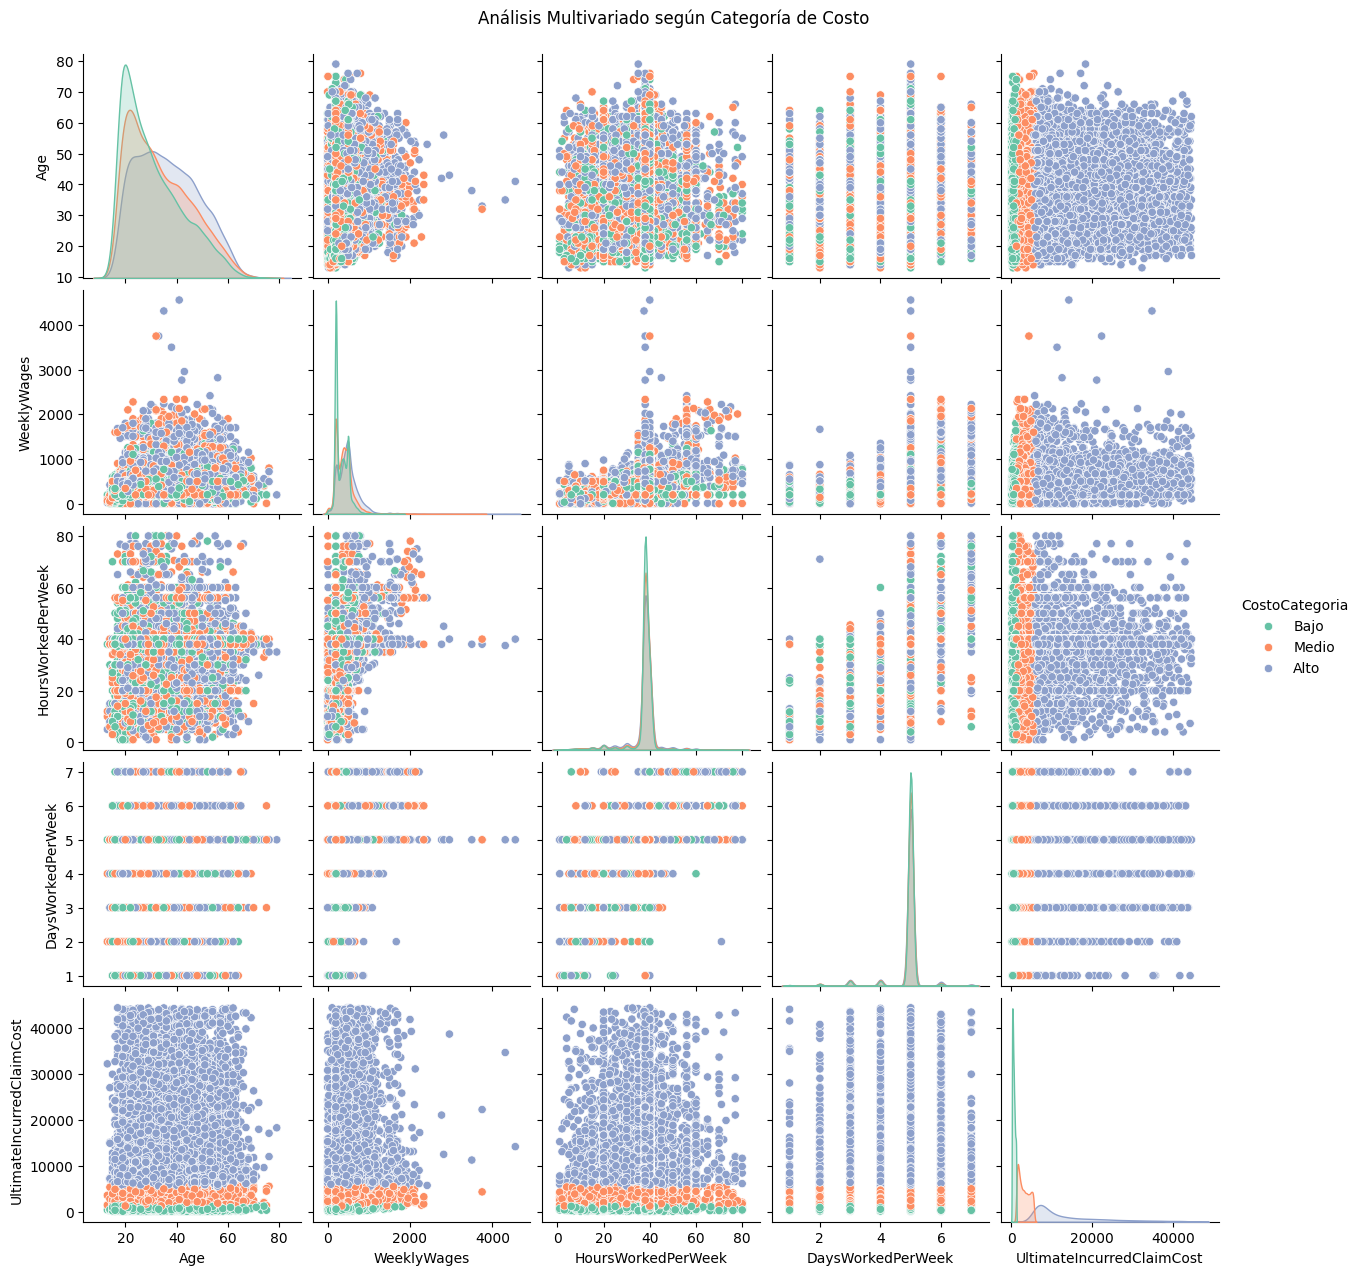

In [67]:
selected_columns = [
    'Age',
    'WeeklyWages',
    'HoursWorkedPerWeek',
    'DaysWorkedPerWeek',
    'UltimateIncurredClaimCost',
    'CostoCategoria'
]

# Pairplot sin corner=True para mostrar todos los gráficos
sns.pairplot(
    seguros_datasetC1[selected_columns],
    hue='CostoCategoria',
    palette='Set2',
    diag_kind='kde',
    corner=False  # Mostramos toda la matriz para ver mejor las combinaciones
)

plt.suptitle('Análisis Multivariado según Categoría de Costo', y=1.02)
plt.show()

# Separación clara entre categorías de costo
# En los gráficos que tienen como eje a UltimateIncurredClaimCostN, las categorías Bajo, Medio y Alto se distribuyen en rangos bastante diferenciados, donde cuando se combinan variables mayores horas y sueldo el costo es mayor.
# Variables como WeeklyWages y HoursWorkedPerWeek tienden a agrupar más siniestros altos en los extremos: Trabajadores con más horas y sueldos más altos aparecen más en la categoría de costo Alto.
# La edad no muestra una relación fuerte con el costo final (UltimateIncurredClaimCostN): las tres categorías de costo (Bajo, Medio, Alto) están distribuidas a lo largo de diferentes edades, sin una tendencia evidente.
# En conjunto, estas relaciones sugieren que incluir variables como horas trabajadas y sueldo semanal en modelos de regresión es importante para predecir y explicar el costo de los siniestros de forma efectiva.
# Parcialmente se cumple la hipótesis, ya que no se observa una relación fuerte o clara entre la edad y el UltimateIncurredClaimCostN (costo final del siniestro).

In [68]:
seguros_datasetC1.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Accident_year,Accident_month,Accident_dayofweek,days_report
count,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000,34210.000000
mean,33.537796,0.116019,0.008769,407.636785,37.402272,4.903654,5818.270915,5937.472098,1996.317890,6.507337,2.298363,37.628120
std,12.057658,0.512081,0.102779,232.293996,6.565969,0.539000,10166.616619,7926.114996,5.131479,3.403457,1.700031,58.851055
min,13.000000,0.000000,0.000000,1.000000,1.000000,1.000000,50.000000,121.886805,1988.000000,1.000000,0.000000,-1.000000
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,630.000000,865.040161,1992.000000,4.000000,1.000000,13.000000
50%,31.000000,0.000000,0.000000,386.150000,38.000000,5.000000,1900.000000,2972.277883,1996.000000,7.000000,2.000000,21.000000
75%,42.000000,0.000000,0.000000,500.000000,40.000000,5.000000,7500.000000,7182.517892,2001.000000,9.000000,4.000000,40.000000
max,79.000000,6.000000,3.000000,4556.000000,80.000000,7.000000,690000.000000,44454.120190,2005.000000,12.000000,6.000000,1088.000000


In [69]:
print(seguros_datasetC1.head())

  ClaimNumber        DateTimeOfAccident              DateReported  Age Gender  \
0   WC8205482 2002-04-09 07:00:00+00:00 2002-07-05 00:00:00+00:00   48      M   
1   WC6922469 1999-01-07 11:00:00+00:00 1999-01-20 00:00:00+00:00   43      F   
2   WC5442654 1996-03-25 00:00:00+00:00 1996-04-14 00:00:00+00:00   30      M   
3   WC9796897 2005-06-22 13:00:00+00:00 2005-07-22 00:00:00+00:00   41      M   
4   WC2603726 1990-08-29 08:00:00+00:00 1990-09-27 00:00:00+00:00   36      M   

  MaritalStatus  DependentChildren  DependentsOther  WeeklyWages  \
0             M                  0                0       500.00   
1             M                  0                0       509.34   
2             U                  0                0       709.10   
3             S                  0                0       555.46   
4             M                  0                0       377.10   

  PartTimeFullTime  ...                                   ClaimDescription  \
0                F  ...  L

In [70]:
#Vamos a analizar distintos modelos de regresión para predecir el costo final de los siniestros.
# Esto nos permitirá identificar las variables más relevantes e incrementar la precisión en la estimación de pérdidas
# La comparación de modelos ayudara a elegir el más eficaz para la toma de decisiones.

# Regresion lineal  multiple

In [71]:
# Entrené un modelo de regresión lineal para predecir el costo final de reclamaciones de seguros. Preparé los datos convirtiendo columnas numéricas
# Codificando variables categóricas, escalando las variables y dividiendo en entrenamiento/prueba.
# Se evalua el modelo con métricas como MAE, RMSE y R² para validar su desempeño.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

#  Conversión de columnas numéricas

num_cols = ['Age', 'DependentChildren', 'WeeklyWages', 'HoursWorkedPerWeek',
            'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']

for col in num_cols:
    seguros_datasetC1[col] = pd.to_numeric(seguros_datasetC1[col], errors='coerce')


# Codificación de categóricas (sin incluir 'CostoCategoria')

categorical_cols = ['Gender', 'MaritalStatus', 'PartTimeFullTime', 'categoria_incidente', 'GrupoEdad']
seguros_datasetC1 = pd.get_dummies(seguros_datasetC1, columns=categorical_cols, drop_first=True)


# Definición de X (features) e y (target)

y = seguros_datasetC1['UltimateIncurredClaimCost']

X = seguros_datasetC1.drop(columns=[
    'ClaimNumber', 'DateTimeOfAccident', 'DateReported',
    'ClaimDescription', 'UltimateIncurredClaimCost', 'CostoCategoria'  # Quitamos el target y columnas irrelevantes
], errors='ignore')

# Escalado de variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression ===")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Comparación valores reales vs predicho

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison.head(10))

=== Linear Regression ===
MSE: 20236303.10
MAE: 2463.43
RMSE: 4498.48
R²: 0.6867
         Actual    Predicted
0   2473.425921  4634.327701
1    556.622287  3061.444638
2    413.707265  1821.338243
3   5090.790319  4955.239901
4   2741.097666  5207.981086
5   1142.521505   890.179499
6  10489.681350  5148.510339
7   1025.211221  2576.849909
8    331.589403  1089.797766
9   1164.366469   726.292934


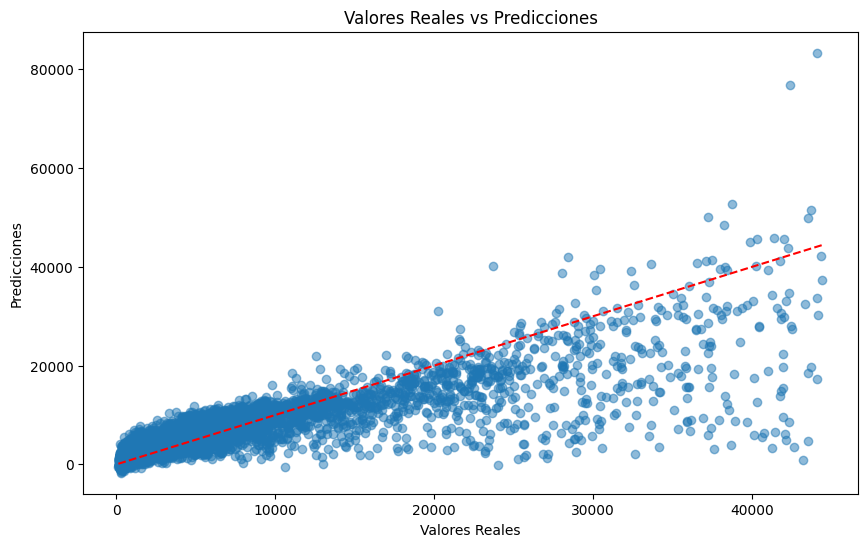

In [72]:
# Visualización de resultados
# El modelo captura la tendencia general, pero tiende a subestimar valores altos, mostrando cierta dispersión a medida que aumentan los costos reales.
# Esto indica que el modelo podría mejorarse para casos de alto costo.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

# Arbol de decision Individual

In [73]:
# Como alternativa al modelo lineal, entrené un árbol de decisión para predecir el costo final de las reclamaciones.
# Este modelo no asume relaciones lineales y puede adaptarse mejor a patrones complejos o no evidentes en los datos.
# Permite identificar fácilmente qué variables tienen mayor impacto en las decisiones del modelo.
# El árbol mejora la interpretación y puede manejar mejor outliers, aunque puede sobreajustarse si no se regula adecuadamente.

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Entrenamiento del árbol
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predicción
y_pred = tree.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Árbol de Decisión Individual ===")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Comparación valores reales vs predicho

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison.head(10))

=== Árbol de Decisión Individual ===
MSE: 17667454.54
MAE: 2141.81
RMSE: 4203.27
R²: 0.7265
         Actual    Predicted
0   2473.425921  6523.329903
1    556.622287  1669.539940
2    413.707265  1669.539940
3   5090.790319  6523.329903
4   2741.097666  4247.344929
5   1142.521505  4247.344929
6  10489.681350  6523.329903
7   1025.211221  2918.502550
8    331.589403   893.467566
9   1164.366469  1669.539940


# Random Forest

In [74]:
# Como tercer enfoque, utilicé un Random Forest, un conjunto de múltiples árboles de decisión que trabajan en conjunto para mejorar la precisión y reducir el sobreajuste.
# A diferencia del árbol individual, este modelo es más robusto y generaliza mejor, combinando varias predicciones para obtener un resultado más estable.
# Es ideal para capturar relaciones complejas y manejar ruido en los datos, aunque pierde algo de interpretabilidad.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Asumiendo que tienes X_train, X_test, y_train, y_test ya definidos y escalados

# Crear y entrenar modelo RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en test
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Regression ===")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

# Mostrar comparación valores reales vs predichos (primeros 10)
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}).reset_index(drop=True)
print(comparison_rf.head(10))

=== Random Forest Regression ===
MSE: 16794016.87
MAE: 2035.42
RMSE: 4098.05
R²: 0.7400
         Actual    Predicted
0   2473.425921  5715.949980
1    556.622287  1197.738210
2    413.707265  1008.491811
3   5090.790319  4745.794733
4   2741.097666  3515.104678
5   1142.521505  1600.582778
6  10489.681350  8138.799400
7   1025.211221  2648.181496
8    331.589403  1722.652537
9   1164.366469   866.337520


In [75]:
# Elego el modelo Random Forest porque obtuvo un mejor desempeño predictivo en comparación con la regresión lineal, alcanzando un R² de 0.75.
#Este modelo puede detectar relaciones más complejas entre las variables sin necesidad de que los datos estén perfectamente ordenados.
# Maneja bien valores extremos y no se ajusta demasiado a los datos

# **K-Nearest Neighbors (KNN)**

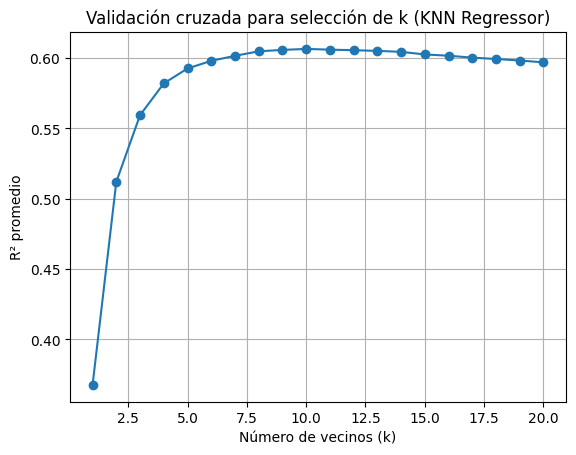

In [76]:
# El último modelo que probé fue K-Nearest Neighbors (KNN), que predice el costo de una reclamación en base a los ejemplos más similares del conjunto de entrenamiento.
# Este enfoque no hace suposiciones sobre la forma de los datos y puede adaptarse bien a patrones locales.
# Sin embargo, es sensible a la escala de los datos y puede volverse ineficiente con grandes volúmenes, por lo que el escalado previo fue clave.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# Probar varios valores de k (por ejemplo, k=1 a k=20)
k_range = range(1, 21)
k_scores = []

# Definir KFold con semilla
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluación con validación cruzada usando R²
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')
    k_scores.append(np.mean(scores))

#  Visualizar el rendimiento
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('R² promedio')
plt.title('Validación cruzada para selección de k (KNN Regressor)')
plt.grid(True)
plt.show()

In [77]:
# Entrenar modelo final con k=11
knn_final = KNeighborsRegressor(n_neighbors=11)
knn_final.fit(X_train, y_train)

# Predecir en test
y_pred = knn_final.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== KNN Regressor con k=11 ===")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Comparación real vs predicho (primeros 10)
comparison = pd.DataFrame({'Real': y_test, 'Predicho': y_pred}).reset_index(drop=True)
print("\nComparación valores reales vs predichos (primeros 10):")
print(comparison.head(10))


=== KNN Regressor con k=11 ===
MSE: 26225825.95
MAE: 2822.14
RMSE: 5121.12
R²: 0.5940

Comparación valores reales vs predichos (primeros 10):
           Real     Predicho
0   2473.425921  3414.565661
1    556.622287  1767.258886
2    413.707265  2014.732659
3   5090.790319  4747.867073
4   2741.097666  5834.494086
5   1142.521505   990.600394
6  10489.681350  3790.793040
7   1025.211221  1181.324359
8    331.589403   951.376463
9   1164.366469  1094.691453


In [78]:
# Elegi el modelo Random Forest porque obtuvo un mejor desempeño predictivo en comparación con los demas modelo, alcanzando un R² de 0.75.
# Este modelo puede detectar relaciones más complejas entre las variables sin necesidad de que los datos estén perfectamente ordenados.
# Maneja bien valores extremos y no se ajusta demasiado a los datos

In [79]:
# Para mejorar el rendimiento del modelo de Random Forest, apliqué una búsqueda aleatoria (RandomizedSearchCV) sobre varios hiperparámetros clave como el número de árboles, profundidad, y tamaño mínimo de muestras.
# Esto permitió encontrar la combinación óptima y así obtener un modelo más preciso y generalizable.

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
import numpy as np

# Convertir y a numpy array (por seguridad)
y_array = np.array(y)

# División train/test con datos escalados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_array, test_size=0.2, random_state=42)

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 300),  # Árboles a usar (100-299)
    'max_depth': [None, 10, 20, 30], # Profundidad máxima
    'min_samples_split': randint(2, 11), # Mín. muestras para dividir
    'min_samples_leaf': randint(1, 5), # Mín. muestras en hoja
    'max_features': [None, 'sqrt', 'log2'] # Features usadas por división
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenar con búsqueda aleatoria
random_search.fit(X_train, y_train)

# Mejor modelo e hiperparámetros
best_rf = random_search.best_estimator_
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# Evaluar en test
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros encontrados: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 191}


In [80]:
# Predecir en test
y_pred = best_rf.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Random Forest Regressor Optimizado ===")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Comparar primeros 10 valores reales vs predichos
comparison = pd.DataFrame({'Real': y_test, 'Predicho': y_pred}).reset_index(drop=True)
print(comparison.head(10))


=== Random Forest Regressor Optimizado ===
MSE: 15861429.98
MAE: 1882.53
RMSE: 3982.64
R²: 0.7545
           Real     Predicho
0   2473.425921  5138.444586
1    556.622287  1149.534390
2    413.707265  1171.803406
3   5090.790319  5574.055716
4   2741.097666  3852.817861
5   1142.521505  1659.446284
6  10489.681350  8121.247565
7   1025.211221  2417.627356
8    331.589403   704.671793
9   1164.366469  1134.211204


# Conclusión
En este proyecto se evaluaron varios modelos de regresión para predecir el monto de los siniestros en un dataset de seguros, utilizando la métrica R² como criterio de desempeño. Los resultados mostraron que el Random Forest Regressor sin optimización presentó el mejor rendimiento (R² = 0.7400) en comparación con K-Nearest Neighbors (R² = 0.5940), regresión lineal (R² = 0.6867) y árbol de decisión individual (R² = 0.7265).

Mediante la aplicación de una búsqueda aleatoria de hiperparámetros (RandomizedSearchCV), se optimizó el Random Forest, logrando una mejora significativa en la capacidad predictiva con un R² de 0.7545. Por lo tanto, el modelo final seleccionado fue el Random Forest Regressor optimizado, debido a su robustez y mejor ajuste a los datos.

El análisis también permitió identificar variables clave para explicar el costo de los siniestros, destacando especialmente las horas trabajadas y el sueldo semanal. Estos hallazgos, junto con la comparación entre distintos enfoques (regresión lineal, árboles de decisión, Random Forest y KNN), brindan una base sólida para futuras mejoras y aplicaciones.

Para la compañía de seguros, los resultados sugieren varias oportunidades de implementación y desarrollo, tales como:

Implementar modelos predictivos en tiempo real para estimar el costo de nuevos siniestros, optimizando la planificación de reservas y la toma de decisiones de cobertura.

Incorporar variables adicionales operativas y contextuales (como tipo de accidente y condiciones laborales) para enriquecer la capacidad predictiva del modelo.

Establecer un proceso continuo de feature engineering y optimización de hiperparámetros para elevar la precisión y adaptabilidad de los modelos.

Realizar evaluaciones periódicas del desempeño con datos recientes, garantizando la vigencia y relevancia de las predicciones.

En resumen, este proyecto sienta las bases para una estrategia de analítica predictiva sólida en la aseguradora, que permitirá una mejor gestión de riesgos y una planificación más eficiente de recursos a futuro.